# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Septi Dwi Retno Ningsih
- **Email:** septidwirn@gmail.com
- **ID Dicoding:** septidwirn

## Menentukan Pertanyaan Bisnis

- Apakah ada pola penyewaan sepeda berdasarkan hari dalam seminggu?
<br>Analisis ini dapat memberikan wawasan tentang hari-hari mana yang paling populer untuk menggunakan sepeda, sehingga sistem penyewaan bisa dioptimalkan.

- Apakah ada pola penyewaan sepeda berdasarkan jam dalam sehari?
<br>Analisis ini dapat memberikan wawasan tentang jam berapa banyak pengguna menyewa sepeda, sehingga sistem penyewaan bisa dioptimalkan.

- Bagaimana musim memengaruhi penyewaan sepeda?
<br>Dengan mengaitkan data musim, analisis ini bisa menunjukkan apakah penyewaan sepeda meningkat selama musim tertentu.

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
# menampilkan tabel day.csv
day_df = pd.read_csv("C:/Users/WIN 10/proyek_analisis_data/Bike Sharing Dataset/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
# menampilkan tabel hour.csv
hour_df = pd.read_csv("C:/Users/WIN 10/proyek_analisis_data/Bike Sharing Dataset/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Background**
- Capital bike share system adalah penyewaan sepeda modern yang semua prosesnya otomatis. Sistem ini memungkinkan pengguna dapat dengan mudah menyewa sepeda dari lokasi tertentu dan mengembalikannya di lokasi lain.
- Sistem ini menarik banyak perhatian karena membantu mengurangi masalah lalu lintas, meningkatkan kesehatan, dan menjaga lingkungan.
- Perbedaan utama Capital bike share system dengan transportasi lain seperti bus atau kereta bawah tanah adalah pada jenis data yang dihasilkan. Dalam Capital bike share system, setiap perjalanan mencatat secara jelas durasi (lama perjalanan), posisi keberangkatan, dan posisi kedatangan. Data ini tidak selalu tersedia atau tercatat dengan detail yang sama pada transportasi umum seperti bus atau kereta bawah tanah.
- Data tersebut bisa digunakan untuk memantau pergerakan orang di dalam kota, yang dapat membantu mendeteksi berbagai kejadian penting di kota.

**Insight:**
- Bike Sharing Dataset berisi perhitungan penyewaan sepeda sewaan secara harian (daily_df) dan jam (hour_df) antara tahun 2011 dan 2012 di Capital bike share system Washington D.C., USA, dengan informasi cuaca dan musim yang sesuai.
- Baik day_df dan hour_df memiliki atribut yang sama (sejumlah 16 atribut), kecuali atribut 'hr' yang tidak ada di day_df
- Informasi 17 atribut:
    - instant: record index (indeks dari data atau rekaman)
    - dteday : tanggal penyewaan
    - season : musim (1:springer, 2:summer, 3:fall, 4:winter)
    - yr : tahun (0: 2011, 1:2012)
    - mnth : bulan ( 1 to 12)
    - hr : jam penyewaan (0 to 23) (0: data penyewaan pukul 00.00 - 01.00, 1: data penyewaan pukul 01.00 - 02.00, dst)
    - holiday : apakah hari libur atau bukan (1: hari libur, 0: bukan hari libur)
    - weekday : hari di minggu itu (0: minggu, 1: senin, 2: selasa, 3: rabu, 4: kamis, 5: jumat, 6: sabtu)
    - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
    - weathersit :
        <br>1 : Clear, Few clouds, Partly cloudy, Partly cloudy
        <br>2 : Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
        <br>3 : Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
        <br>4 : Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
    - temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
    - atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
    - hum: Normalized humidity. The values are divided to 100 (max)
    - windspeed: Normalized wind speed. The values are divided to 67 (max)
    - casual: count of casual users
    - registered: count of registered users
    - cnt: count of total rental bikes including both casual and registered

### Assessing Data

#### Menilai Data day_df

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
# Mengecek apakah ada duplikasi data atau tidak
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [6]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Menilai Data hour_df

In [7]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [8]:
# Mengecek apakah ada duplikasi data atau tidak
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [9]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Jumlah data pada day_df dan hour_df telah lengkap atau dengan kata lain tidak ada missing value di dalamnya.
- Terdapat kesalahan tipe data untuk kolom dteday pada day_df dan hour_df. Kolom tersebut harusnya direpresentasikan sebagai tipe data datetime, bukan object. Object digunakan untuk tipe data string.
- Tidak terdapat duplikasi pada day_daf dan hour_df
- Berdasarkan hasil method describe() pada day_df dan hour_df, tidak ditemukan keanehan seperti inaccurate value

### Cleaning Data

In [10]:
# menangani kesalahan tipe data untuk kolom dteday pada day_df
datetime_columns = ["dteday"]
 
for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [11]:
# memastikan penggantian tipe data berhasil dilakukan
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [12]:
# memastikan kembali tidak ada missing value pada day_df
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [13]:
# menangani kesalahan tipe data untuk kolom dteday pada hour_df
datetime_columns = ["dteday"]
 
for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [14]:
# memastikan penggantian tipe data berhasil dilakukan
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [15]:
# memastikan kembali tidak ada missing value pada hour_df
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight:**
- Tipe data kolom dteday pada day_df dan hour_df telah berhasil diubah dari tipe data object menjadi datetime
- day_df dan hour_df sudah bersih dan bisa digunakan untuk proses selanjutnya
    - Tidak ada kesalahan tipe data
    - Tidak ada missing value
    - Tidak ada inaccurate value
    - Tidak ada duplicate data

## Exploratory Data Analysis (EDA)

### Explore Data day_df

In [16]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
211,212,2011-07-31,3,0,7,0,0,0,1,0.805833,0.729796,0.480833,0.164813,1524,2778,4302
455,456,2012-03-31,2,1,3,0,6,0,2,0.424167,0.421708,0.738333,0.250617,2301,3934,6235
313,314,2011-11-10,4,0,11,0,4,1,2,0.380000,0.373721,0.813333,0.189067,190,2743,2933
77,78,2011-03-19,1,0,3,0,6,0,1,0.472500,0.466525,0.379167,0.368167,1424,1693,3117
552,553,2012-07-06,3,1,7,0,5,1,1,0.828333,0.752533,0.450833,0.146142,1366,4841,6207


In [17]:
day_df.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [18]:
day_df.corr()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
dteday,1.000000,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
season,0.412224,0.412224,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
yr,0.866025,0.866025,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
mnth,0.496702,0.496702,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,0.016145,0.016145,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.000016,-0.000016,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,-0.004337,-0.004337,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,-0.021477,-0.021477,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.150580,0.150580,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494


In [19]:
# melihat jumlah penyewa sepeda berdasarkan musim
day_df.groupby(by="season").agg({
    "casual": ["max", "min", "mean", "std", ],
    "registered": ["max", "min", "mean", "std", ],
    "cnt": ["max", "min", "mean", "std", ]
})

casual                               registered                    \
          max  min         mean         std        max  min         mean   
season                                                                     
1        3155    9   334.928177  387.655561       5315  416  2269.204420   
2        3410  120  1106.097826  737.590829       6456  674  3886.233696   
3        3160  118  1202.611702  595.975032       6917  889  4441.691489   
4        3031    2   729.112360  606.318118       6946   20  3999.050562   

                      cnt                                  
                std   max   min         mean          std  
season                                                     
1       1200.269751  7836   431  2604.132597  1399.942119  
2       1353.375628  8362   795  4992.331522  1695.977235  
3       1304.626949  8714  1115  5644.303191  1459.800381  
4       1444.782557  8555    22  4728.162921  1699.615261

In [20]:
# melihat jumlah penyewa sepeda berdasarkan hari dalam seminggu
day_df.groupby(by="weekday").agg({
    "casual": ["max", "min", "mean", "std", ],
    "registered": ["max", "min", "mean", "std", ],
    "cnt": ["max", "min", "mean", "std", ]
})

casual                              registered                     \
           max min         mean         std        max   min         mean   
weekday                                                                     
0         3283  54  1338.295238  809.324777       5657   451  2890.533333   
1         3065   2   674.133333  493.777298       6435    20  3663.990476   
2         1348   9   556.182692  342.748705       6697   573  3954.480769   
3         2562   9   551.144231  401.808954       6946   432  3997.394231   
4         1405  15   590.961538  371.680307       6781   416  4076.298077   
5         2469  38   752.288462  483.422400       6917  1129  3938.000000   
6         3410  57  1465.257143  927.082884       5966   570  3085.285714   

                       cnt                                  
                 std   max   min         mean          std  
weekday                                                     
0        1179.713036  8227   605  4228.828571  1872.496629  
1        1504.215925  7525    22  4338.123810  1793.074013  
2        1549.462149  7767   683  4510.663462  1826.911642  
3        1723.710208  8173   441  4548.538462  2038.095884  
4        1642.753330  7804   431  4667.259615  1939.433317  
5        1494.998698  8362  1167  4690.288462  1874.624870  
6        1358.068784  8714   627  4550.542857  2196.693009

In [21]:
# melihat jumlah penyewa sepeda berdasarkan hari libur atau bukan
day_df.groupby(by="holiday").agg({
    "casual": ["max", "min", "mean", "std", ],
    "registered": ["max", "min", "mean", "std", ],
    "cnt": ["max", "min", "mean", "std", ]
})

casual                               registered                    \
           max  min         mean         std        max  min         mean   
holiday                                                                     
0         3410    2   841.771831  680.528529       6946   20  3685.332394   
1         3065  117  1064.714286  860.046809       5172  573  2670.285714   

                       cnt                                  
                 std   max   min         mean          std  
holiday                                                     
0        1553.704431  8714    22  4527.104225  1929.013947  
1        1492.860246  7403  1000  3735.000000  2103.350660

In [22]:
# melihat jumlah penyewa sepeda berdasarkan hari kerja atau bukan
day_df.groupby(by="workingday").agg({
    "casual": ["max", "min", "mean", "std", ],
    "registered": ["max", "min", "mean", "std", ],
    "cnt": ["max", "min", "mean", "std", ]
})

casual                              registered                    \
              max min         mean         std        max  min         mean   
workingday                                                                    
0            3410  54  1371.134199  873.064794       5966  451  2959.034632   
1            2469   2   606.570000  391.496032       6946   20  3978.250000   

                          cnt                                 
                    std   max  min         mean          std  
workingday                                                    
0           1293.867686  8714  605  4330.168831  2052.141245  
1           1568.692453  8362   22  4584.820000  1878.415583

In [23]:
# melihat jumlah penyewa sepeda berdasarkan cuaca
day_df.groupby(by="weathersit").agg({
    "casual": ["max", "min", "mean", "std", ],
    "registered": ["max", "min", "mean", "std", ],
    "cnt": ["max", "min", "mean", "std", ]
})

casual                             registered                    \
              max min        mean         std        max  min         mean   
weathersit                                                                   
1            3410  15  964.030238  700.476488       6946  416  3912.755940   
2            3155   9  687.352227  619.082767       6844  491  3348.510121   
3            1264   2  185.476190  260.975022       4324   20  1617.809524   

                          cnt                                 
                    std   max  min         mean          std  
weathersit                                                    
1           1533.347265  8714  431  4876.786177  1879.483989  
2           1463.566884  8362  605  4035.862348  1809.109918  
3           1068.290954  4639   22  1803.285714  1240.284449

In [24]:
# melihat jumlah penyewa sepeda berdasarkan suhu
day_df["temp_group"] = day_df.temp.apply(lambda x: "Hot" if x >= 0.7 else ("Warm" if x >= 0.2 else "Cold"))

day_df.groupby(by="temp_group").agg({
    "casual": ["max", "min", "mean", "std", ],
    "registered": ["max", "min", "mean", "std", ],
    "cnt": ["max", "min", "mean", "std", ]
})

casual                               registered                     \
              max  min         mean         std        max   min         mean   
temp_group                                                                      
Cold          333   15   100.909091   71.975848       3162   416  1441.757576   
Hot          3065  467  1210.023077  566.657498       6790  2298  4445.923077   
Warm         3410    2   808.774648  685.244409       6946    20  3604.073944   

                          cnt                                  
                    std   max   min         mean          std  
temp_group                                                     
Cold         527.576240  3292   431  1542.666667   565.030125  
Hot         1195.474766  8173  3285  5655.946154  1286.530334  
Warm        1536.963835  8714    22  4412.848592  1901.073450

In [25]:
# melihat jumlah penyewa sepeda berdasarkan suhu
day_df["atemp_group"] = day_df.atemp.apply(lambda x: "Hot" if x >= 0.7 else ("Warm" if x >= 0.2 else "Cold"))

day_df.groupby(by="atemp_group").agg({
    "casual": ["max", "min", "mean", "std", ],
    "registered": ["max", "min", "mean", "std", ],
    "cnt": ["max", "min", "mean", "std", ]
})

casual                               registered        \
               max  min         mean         std        max   min   
atemp_group                                                         
Cold           333   25    99.607143   74.857563       3162   768   
Hot           2562  513  1067.288462  466.695279       6452  2298   
Warm          3410    2   862.870968  695.670604       6946    20   

                                        cnt                                  
                    mean          std   max   min         mean          std  
atemp_group                                                                  
Cold         1493.535714   527.072803  3292   822  1593.142857   564.884171  
Hot          4284.365385  1154.082473  7592  3285  5351.653846  1297.230668  
Warm         3699.010753  1543.728167  8714    22  4561.881720  1908.808059

In [26]:
# melihat jumlah penyewa sepeda berdasarkan kelembaban
day_df["hum_group"] = day_df.hum.apply(lambda x: "High" if x >= 0.6 else ("Medium" if x >= 0.3 else "Low"))

day_df.groupby(by="hum_group").agg({
    "casual": ["max", "min", "mean", "std", ],
    "registered": ["max", "min", "mean", "std", ],
    "cnt": ["max", "min", "mean", "std", ]
})

casual                               registered                    \
             max min         mean          std        max  min         mean   
hum_group                                                                     
High        3283   2   835.578049   666.049706       6946   20  3619.785366   
Low         3252  46  1318.200000  1362.648964       4571  577  2559.000000   
Medium      3410  25   857.085443   699.422262       6820  768  3720.743671   

                         cnt                                 
                   std   max  min         mean          std  
hum_group                                                    
High       1543.287621  8395   22  4455.363415  1885.690946  
Low        1683.368646  6857  623  3877.200000  2629.893952  
Medium     1577.387251  8714  822  4577.829114  1994.340258

In [27]:
# melihat jumlah penyewa sepeda berdasarkan kelembaban
day_df["windspeed_group"] = day_df.windspeed.apply(lambda x: "High" if x >= 0.4 else ("Medium" if x >= 0.1 else "Low"))

day_df.groupby(by="windspeed_group").agg({
    "casual": ["max", "min", "mean", "std", ],
    "registered": ["max", "min", "mean", "std", ],
    "cnt": ["max", "min", "mean", "std", ]
})

casual                             registered        \
                   max min        mean         std        max   min   
windspeed_group                                                       
High               532  73  316.444444  174.149441       4896  1103   
Low               3410  47  921.424658  760.245938       6898   746   
Medium            3283   2  847.311248  679.693644       6946    20   

                                            cnt                     \
                        mean          std   max   min         mean   
windspeed_group                                                      
High             2692.444444  1356.446747  5382  1529  3008.888889   
Low              3918.931507  1613.496878  8294   920  4840.356164   
Medium           3639.981510  1552.268564  8714    22  4487.292758   

                              
                         std  
windspeed_group               
High             1438.307812  
Low              1932.011814  
Medium           1934.767655

### Explore Data hour_df

In [28]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
14868,14869,2012-09-16,3,1,9,17,0,0,0,1,0.66,0.6212,0.41,0.0000,177,393,570
16591,16592,2012-11-29,4,1,11,1,0,4,1,1,0.22,0.2576,0.64,0.0896,1,15,16
15553,15554,2012-10-15,4,1,10,6,0,1,1,2,0.56,0.5303,0.73,0.2985,6,141,147
603,604,2011-01-28,1,0,1,9,0,5,1,3,0.18,0.2121,0.86,0.0896,6,95,101
9116,9117,2012-01-20,1,1,1,18,0,5,1,2,0.20,0.2273,0.34,0.0896,5,296,301


In [29]:
hour_df.describe()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [30]:
hour_df.corr()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.999995,0.404046,0.866014,0.489164,-0.004775,0.014723,0.001357,-0.003416,-0.014198,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
dteday,0.999995,1.000000,0.404452,0.865648,0.489808,-0.006161,0.014737,0.001372,-0.003366,-0.014063,0.136074,0.137543,0.010196,-0.074645,0.157821,0.281450,0.277753
season,0.404046,0.404452,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
yr,0.866014,0.865648,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
mnth,0.489164,0.489808,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hr,-0.004775,-0.006161,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,0.014723,0.014737,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday,0.001357,0.001372,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday,-0.003416,-0.003366,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014198,-0.014063,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426


In [44]:
# melihat jumlah penyewa sepeda berdasarkan musim
hour_df.groupby(by="season").agg({
    "casual": ["max", "min", "mean", "std", ],
    "registered": ["max", "min", "mean", "std", ],
    "cnt": ["max", "min", "mean", "std", ]
})

casual                           registered                  \
          max min       mean        std        max min        mean   
season                                                               
1         367   0  14.290901  27.463006        681   0   96.823668   
2         361   0  46.160581  57.455803        782   0  162.183488   
3         350   0  50.287144  51.751916        886   0  185.729093   
4         362   0  30.666824  46.034058        876   0  168.202032   

                    cnt                              
               std  max min        mean         std  
season                                               
1       104.347605  801   1  111.114569  119.224010  
2       152.751493  957   1  208.344069  188.362473  
3       166.430156  977   1  236.016237  197.711630  
4       157.559340  967   1  198.868856  182.967972

In [32]:
# melihat jumlah penyewa sepeda berdasarkan jam dalam sehari
hour_df.groupby(by="hr").agg({
    "casual": ["max", "min", "mean", "std", ],
    "registered": ["max", "min", "mean", "std", ],
    "cnt": ["max", "min", "mean", "std", ]
})

casual                           registered                              \
      max min       mean        std        max min        mean         std   
hr                                                                           
0      68   0  10.158402  10.667953        234   0   43.739669   34.019585   
1      49   0   6.504144   7.735334        139   0   26.871547   27.344153   
2      44   0   4.772028   6.514780        104   0   18.097902   21.303895   
3      26   0   2.715925   4.315795         61   0    9.011478    9.743691   
4      13   0   1.253945   1.887669         22   0    5.098996    3.134479   
5      16   0   1.411437   1.790581         64   0   18.478382   12.674751   
6      19   0   4.161379   3.691509        203   0   71.882759   53.535307   
7      40   0  11.055021   8.356205        572   1  201.009629  157.120459   
8      69   0  21.679505  13.741229        808   4  337.331499  229.698404   
9     142   0  30.891334  24.472856        399   6  188.418157   84.633490   
10    209   0  46.477304  41.346206        351   8  127.191197   66.281668   
11    268   0  59.540578  54.481788        446   5  148.602476   79.090301   
12    362   0  68.293956  64.394237        526   3  185.021978   89.240873   
13    355   0  72.308642  69.819228        491   9  181.352538   87.424775   
14    361   0  75.567901  71.599225        502  12  165.381344   84.055205   
15    357   0  74.905350  70.289359        456   4  176.327846   84.488219   
16    367   0  73.745205  67.015206        481   8  238.238356  103.765726   
17    347   0  74.273973  61.491021        885  14  387.178082  211.676303   
18    266   0  61.120879  50.981553        886  20  364.390110  203.599896   
19    230   0  48.770604  42.328913        662  11  262.752747  138.708622   
20    237   0  36.233516  32.103347        461   8  189.796703  100.293791   
21    222   0  28.255495  25.378252        362   6  144.059066   73.149848   
22    175   0  22.252747  20.450211        327   5  109.082418   55.252765   
23     71   0  15.199176  13.804596        220   2   72.631868   40.446431   

    cnt                              
    max min        mean         std  
hr                                   
0   283   2   53.898072   42.307910  
1   168   1   33.375691   33.538727  
2   132   1   22.869930   26.578642  
3    79   1   11.727403   13.239190  
4    28   1    6.352941    4.143818  
5    66   1   19.889819   13.200765  
6   213   1   76.044138   55.084348  
7   596   1  212.064649  161.441936  
8   839   5  359.011004  235.189285  
9   426  14  219.309491   93.703458  
10  539   8  173.668501  102.205413  
11  663  10  208.143054  127.495536  
12  776   3  253.315934  145.081134  
13  760  11  253.661180  148.107657  
14  750  12  240.949246  147.271574  
15  750   7  251.233196  144.632541  
16  783  11  311.983562  148.682618  
17  976  15  461.452055  232.656611  
18  977  23  425.510989  224.639304  
19  743  11  311.523352  161.050359  
20  567  11  226.030220  119.670164  
21  584   6  172.314560   89.788893  
22  502   9  131.335165   69.937782  
23  256   2   87.831044   50.846889

In [33]:
# melihat jumlah penyewa sepeda berdasarkan cuaca
hour_df.groupby(by="weathersit").agg({
    "casual": ["max", "min", "mean", "std", ],
    "registered": ["max", "min", "mean", "std", ],
    "cnt": ["max", "min", "mean", "std", ]
})

casual                           registered                  \
              max min       mean        std        max min        mean   
weathersit                                                               
1             367   0  40.545431  53.126559        886   0  164.323841   
2             350   0  29.595290  41.356704        822   0  145.570202   
3             263   0  16.055673  30.017327        791   0   95.523608   
4               6   1   2.666667   2.886751        158  22   71.666667   

                        cnt                              
                   std  max min        mean         std  
weathersit                                               
1           156.890453  977   1  204.869272  189.487773  
2           142.390431  957   1  175.165493  165.431589  
3           114.773469  891   1  111.579281  133.781045  
4            75.048873  164  23   74.333333   77.925178

In [34]:
# melihat jumlah penyewa sepeda berdasarkan suhu
hour_df["temp_group"] = hour_df.temp.apply(lambda x: "Hot" if x >= 0.7 else ("Warm" if x >= 0.2 else "Cold"))

hour_df.groupby(by="temp_group").agg({
    "casual": ["max", "min", "mean", "std", ],
    "registered": ["max", "min", "mean", "std", ],
    "cnt": ["max", "min", "mean", "std", ]
})

casual                           registered                  \
              max min       mean        std        max min        mean   
temp_group                                                               
Cold           42   0   2.829609   4.150190        487   0   54.983240   
Hot           362   0  73.120889  58.563334        876   1  233.590519   
Warm          367   0  27.935581  42.818671        886   0  138.841511   

                        cnt                              
                   std  max min        mean         std  
temp_group                                               
Cold         65.767250  501   1   57.812849   67.865199  
Hot         163.403657  970   2  306.711407  193.179524  
Warm        143.466178  977   1  166.777092  168.424874

In [35]:
# melihat jumlah penyewa sepeda berdasarkan suhu
hour_df["atemp_group"] = hour_df.atemp.apply(lambda x: "Hot" if x >= 0.7 else ("Warm" if x >= 0.2 else "Cold"))

hour_df.groupby(by="atemp_group").agg({
    "casual": ["max", "min", "mean", "std", ],
    "registered": ["max", "min", "mean", "std", ],
    "cnt": ["max", "min", "mean", "std", ]
})

casual                           registered                  \
               max min       mean        std        max min        mean   
atemp_group                                                               
Cold            42   0   3.408565   4.824952        487   0   60.181713   
Hot            317   0  77.943156  56.004395        786   2  236.740464   
Warm           367   0  33.789827  47.811070        886   0  151.808077   

                         cnt                              
                    std  max min        mean         std  
atemp_group                                               
Cold          69.352948  501   1   63.590278   71.834535  
Hot          154.788573  897   2  314.683620  181.320285  
Warm         150.797288  977   1  185.597905  179.407755

In [36]:
# melihat jumlah penyewa sepeda berdasarkan kelembaban
hour_df["hum_group"] = hour_df.hum.apply(lambda x: "High" if x >= 0.6 else ("Medium" if x >= 0.3 else "Low"))

hour_df.groupby(by="hum_group").agg({
    "casual": ["max", "min", "mean", "std", ],
    "registered": ["max", "min", "mean", "std", ],
    "cnt": ["max", "min", "mean", "std", ]
})

casual                           registered                  \
             max min       mean        std        max min        mean   
hum_group                                                               
High         310   0  22.752017  34.929109        833   0  123.206187   
Low          355   0  63.022693  61.747686        802   0  223.511346   
Medium       367   0  50.827850  58.596201        886   0  189.167612   

                       cnt                              
                  std  max min        mean         std  
hum_group                                               
High       141.408653  917   1  145.958204  161.013036  
Low        162.653765  970   1  286.534039  196.541315  
Medium     153.577918  977   1  239.995462  189.487316

In [37]:
# melihat jumlah penyewa sepeda berdasarkan kelembaban
hour_df["windspeed_group"] = hour_df.windspeed.apply(lambda x: "Low" if x <= 0.1 else ("High" if x > 0.4 else "Medium"))

hour_df.groupby(by="windspeed_group").agg({
    "casual": ["max", "min", "mean", "std", ],
    "registered": ["max", "min", "mean", "std", ],
    "cnt": ["max", "min", "mean", "std", ]
})

casual                           registered                  \
                   max min       mean        std        max min        mean   
windspeed_group                                                               
High               321   0  37.618750  49.077310        796   0  160.957292   
Low                367   0  27.842164  43.678732        876   0  128.609154   
Medium             362   0  37.734665  50.580686        886   0  160.332995   

                             cnt                              
                        std  max min        mean         std  
windspeed_group                                               
High             142.575210  900   1  198.576042  172.552978  
Low              142.278672  970   1  156.451318  167.873713  
Medium           153.722390  977   1  198.067660  184.611338

### Insight:
- General:
<br>Dataframe hour_df memiliki data yang lebih detail dibandingkan day_df karena rentang waktunya lebih singkat. Atribut cuaca seperti suhu, kelembaban, dan lainnya yang bisa berubah dalam hitungan jam akan lebih akurat nilainya karena merupakan nilai hitungan rata-rata untuk rentang waktu 1 jam saja.
- Pengaruh musim (season) terhadap jumlah penyewa:
    - Dilihat dari rata-rata jumlah total penyewa sepeda (cnt) disetiap musim, cenderung lebih banyak penyewa di musim gugur (3: fall). Baik pada day_df maupun hour_df menunjukan hasil seperti ini.
    - Urutan rata-rata jumlah total penyewa sepeda (cnt) disetiap musim dari yang terbesar
      <br>Fall, summer, winter, spring(3, 2, 4, 1)
- Pengaruh hari dalam seminggu (weekday) terhadap jumlah penyewa:
    - Rata-rata jumlah penyewa registered lebih banyak dibandingkan penyewa casual dari senin hingga minggu
    - Penyewa casual lebih banyak ketika weekend (urutannya: 6, 0, 1, 3, 5, 4, 2)
    - Penyewa registered lebih banyak ketika hari kerja (urutannya: 4, 3, 2, 5, 1, 6, 0) 
- Pengaruh jam dalam sehari (hr) terhadap jumlah penyewa:
    - Rata-rata jumlah penyewa registered lebih banyak dibandingkan penyewa casual disetiap jam
    - Rata-rata jumlah total penyewa tinggi ketika memasuki pukul 8 pagi, 5 sore, dan 6 sore
- Pengaruh hari libur (holiday) terhadap jumlah penyewa:
    - Rata-rata jumlah total penyewa ketika libur lebih sedikit dibandingkan ketika tidak libur
    - Rata-rata jumlah penyewa casual lebih banyak ketika hari libur
    - Rata-rata jumlah penyewa registered lebih sedikit ketika hari libur
- Pengaruh hari kerja (workingday) terhadap jumlah penyewa:
    - Rata-rata jumlah total penyewa ketika hari kerja lebih banyak dibandingkan ketika libur
    - Rata-rata jumlah penyewa casual lebih sedikit ketika hari kerja
    - Rata-rata jumlah penyewa registered lebih banyak ketika hari kerja
- Pengaruh cuaca terhadap jumlah penyewa:
    - Pada day_df hanya tercatat 3 kategori cuaca dari 4 kategori yang ada. Sedangkan pada hour_df terdapat 4 kategori cuaca
    - Rata-rata jumlah penyewa casual lebih sedikit dibandingka penyewa registered disetiap kategori cuaca
    - Rata-rata jumlah total penyewa paling banyak ketika cuaca kategori 1 (cerah) dan paling sedikit ketika cuaca kategori 4 (hujan badai)
- Pengaruh suhu terhadap jumlah penyewa
    - Terdapat 2 jenis suhu temp dan atemp, jumlah penyewa sepeda berdasarkan kedua jenis suhu ini memiliki kecenderungan hasil yang sama
    - Baik pada day_df maupun hour_df menunjukan kecenderungan yang sama
    - Rata-rata jumlah penyewa casual lebih sedikit dibandingka penyewa registered disetiap kategori suhu
    - Rata-rata jumlah total penyewa paling banyak ketika suhu tinggi (hot) dan paling sedikit ketika suhu dingin (cold)
- Pengaruh kelembaban (hum) terhadap jumlah penyewa:
    - Terdapat perbedaan hasil antara day_df dan hour_df. Hal ini dikarenakan perbedaan rentang waktu yang digunakan untuk menentukan nilai kelembaban. Nilai kelembaban pada hour_df lebih akurat karena diperbarui setiap jam.
    - Berdasarkan hour_df didapatkan pola bahwa rata-rata jumlah total penyewa sepeda paling banyak ketika kelembaban rendah (low) dan paling sedikit ketika kelembaban tinggi (high)
    - Dalam kelembaban apapun, rata-rata jumlah penyewa casual lebih sedikit dibandingkan dengan penyewa registered
- Pengaruh kecepatan angin (windspeed) terhadap jumlah penyewa:
    - Terdapat perbedaan hasil antara day_df dan hour_df. Didapatkan hasil yang berkebalikan antara day_df dan hour_df
    - Berdasarkan day_df, rata-rata jumlah total penyewa sepeda paling banyak ketika kecepatan angin low dan paling sedikit ketika kecepatan angin high
    - Berdasarkan day_df, rata-rata jumlah total penyewa sepeda paling banyak ketika kecepatan angin high dan paling sedikit ketika kecepatan angin low
- casual customer vs registered customer:
    - Rata-rata jumlah penyewa casual per-hari selalu lebih sedikit dibandingkan rata-rata jumlah penyewa registered. Entah itu hari libur, hari kerja, dan apapun cuacanya
    - Namun dapat dilihat bahwa, rata-rata jumlah penyewa casual akan meningkat ketika akhir pekan dan hari libur. Hal ini berbanding terbalik dengan rata-rata jumlah penyewa registered yang menurun ketika akhir pekan dan hari libur

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah ada pola penyewaan sepeda berdasarkan hari dalam seminggu?

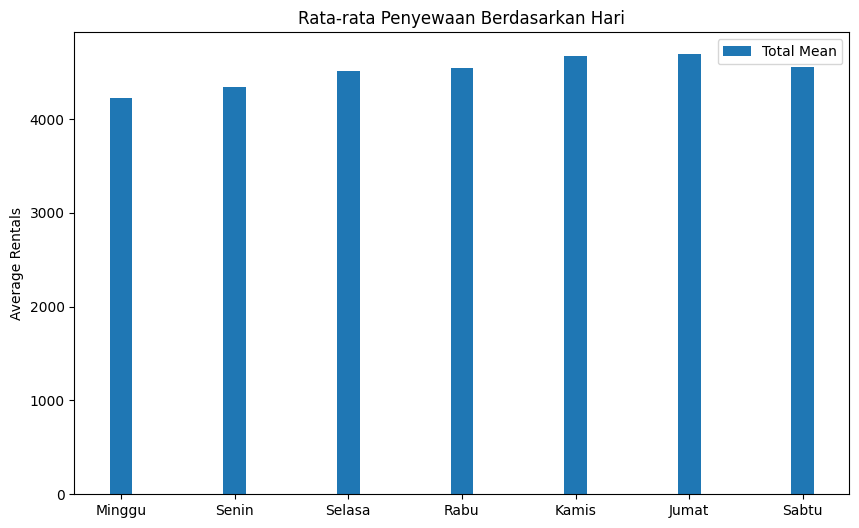

In [38]:
# Menyiapkan dataframe
daily_rent_df = day_df.groupby(by="weekday").agg({
    "casual": ["mean"],
    "registered": ["mean"],
    "cnt": ["mean"]
})
daily_rent_df

# Mengatur DataFrame agar lebih mudah untuk plot
daily_rent_df.columns = ["casual_mean", "registered_mean", "cnt_mean"]
daily_rent_df = daily_rent_df.reset_index()

hari_labels = ["Minggu", "Senin", "Selasa", "Rabu", "Kamis", "Jumat", "Sabtu"]

# Membuat grafik bar
fig, ax = plt.subplots(figsize=(10, 6))

# Plot tiap kategori
ax.bar(daily_rent_df["weekday"], daily_rent_df["cnt_mean"], width=-0.2, label='Total Mean', align='center')
#ax.bar(daily_rent_df["weekday"], daily_rent_df["registered_mean"], width=0.2, label='Registered Mean', align='edge')
#ax.bar(daily_rent_df["weekday"], daily_rent_df["casual_mean"], width=0.2, label='Casual Mean', align='edge')

# Memberi judul dan label sumbu
ax.set_title("Rata-rata Penyewaan Berdasarkan Hari")
ax.set_ylabel("Average Rentals")
ax.legend()
plt.xticks(ticks=daily_rent_df["weekday"], labels=hari_labels, fontsize=10)
plt.show()

In [39]:
"""
# Menyiapkan dataframe
daily_rent_df = day_df.groupby(by="weekday").agg({
    "casual": ["mean"],
    "registered": ["mean"],
    "cnt": ["mean"]
})

# Memberi label hari
hari_labels = ["Minggu", "Senin", "Selasa", "Rabu", "Kamis", "Jumat", "Sabtu"]

# Memplot data rata-rata total sewa berdasarkan hari
plt.figure(figsize=(10, 5)) 
plt.plot(daily_rent_df["cnt"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Rata-Rata Jumlah Total Penyewa Berdasarkan Hari", loc="center", fontsize=20) 
plt.xticks(ticks=range(7), labels=hari_labels, fontsize=10) 
plt.yticks(fontsize=10) 
plt.show()
"""

'\n# Menyiapkan dataframe\ndaily_rent_df = day_df.groupby(by="weekday").agg({\n    "casual": ["mean"],\n    "registered": ["mean"],\n    "cnt": ["mean"]\n})\n\n# Memberi label hari\nhari_labels = ["Minggu", "Senin", "Selasa", "Rabu", "Kamis", "Jumat", "Sabtu"]\n\n# Memplot data rata-rata total sewa berdasarkan hari\nplt.figure(figsize=(10, 5)) \nplt.plot(daily_rent_df["cnt"], marker=\'o\', linewidth=2, color="#72BCD4")\nplt.title("Rata-Rata Jumlah Total Penyewa Berdasarkan Hari", loc="center", fontsize=20) \nplt.xticks(ticks=range(7), labels=hari_labels, fontsize=10) \nplt.yticks(fontsize=10) \nplt.show()\n'

### Pertanyaan 2: Apakah ada pola penyewaan sepeda berdasarkan jam dalam sehari?

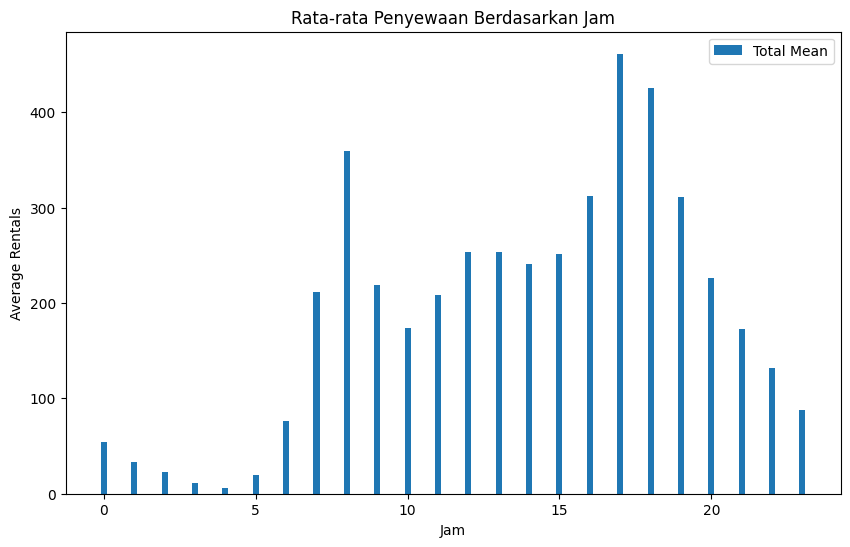

In [41]:
# Menyiapkan dataframe
hour_rent_df = hour_df.groupby(by="hr").agg({
    "casual": ["mean"],
    "registered": ["mean"],
    "cnt": ["mean"]
})
hour_rent_df

# Mengatur DataFrame agar lebih mudah untuk plot
hour_rent_df.columns = ["casual_mean", "registered_mean", "cnt_mean"]
hour_rent_df = hour_rent_df.reset_index()

# Membuat grafik bar
fig, ax = plt.subplots(figsize=(10, 6))

# Plot tiap kategori
ax.bar(hour_rent_df["hr"], hour_rent_df["cnt_mean"], width=-0.2, label='Total Mean', align='center')
#ax.bar(hour_rent_df["hr"], hour_rent_df["registered_mean"], width=0.2, label='Registered Mean', align='edge')
#ax.bar(hour_rent_df["hr"], hour_rent_df["casual_mean"], width=0.2, label='Casual Mean', align='edge')

# Memberi judul dan label sumbu
ax.set_title("Rata-rata Penyewaan Berdasarkan Jam")
ax.set_xlabel("Jam")
ax.set_ylabel("Average Rentals")
ax.legend()
plt.show()

In [42]:
"""
# Menyiapkan dataframe
hour_rent_df = hour_df.groupby(by="hr").agg({
    "casual": ["mean"],
    "registered": ["mean"],
    "cnt": ["mean"]
})

# Memplot data rata-rata total sewa berdasarkan jam
plt.figure(figsize=(10, 5)) 
plt.plot(hour_rent_df["cnt"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Rata-Rata Jumlah Total Penyewa Berdasarkan Jam", loc="center", fontsize=20) 
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.show()
"""

'\n# Menyiapkan dataframe\nhour_rent_df = hour_df.groupby(by="hr").agg({\n    "casual": ["mean"],\n    "registered": ["mean"],\n    "cnt": ["mean"]\n})\n\n# Memplot data rata-rata total sewa berdasarkan jam\nplt.figure(figsize=(10, 5)) \nplt.plot(hour_rent_df["cnt"], marker=\'o\', linewidth=2, color="#72BCD4")\nplt.title("Rata-Rata Jumlah Total Penyewa Berdasarkan Jam", loc="center", fontsize=20) \nplt.xticks(fontsize=10) \nplt.yticks(fontsize=10) \nplt.show()\n'

### Pertanyaan 3: Bagaimana musim memengaruhi jumlah penyewaan sepeda?

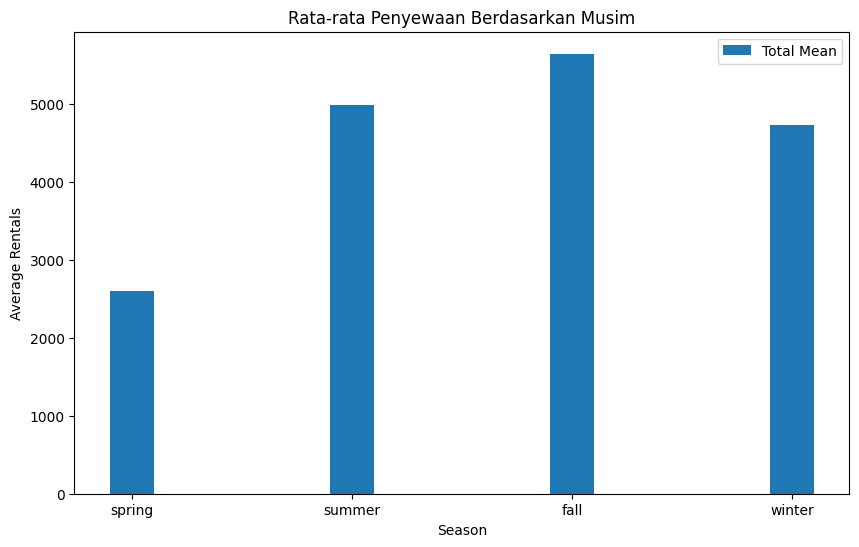

In [43]:
# Menyiapkan dataframe
seasonal_rent_df = day_df.groupby(by="season").agg({
    "casual": ["mean"],
    "registered": ["mean"],
    "cnt": ["mean"]
})
#seasonal_rent_df

# Mengatur DataFrame agar lebih mudah untuk plot
seasonal_rent_df.columns = ["casual_mean", "registered_mean", "cnt_mean"]
seasonal_rent_df = seasonal_rent_df.reset_index()

season_labels = ["spring", "summer", "fall", "winter",]

# Membuat grafik bar
fig, ax = plt.subplots(figsize=(10, 6))

# Plot tiap kategori
ax.bar(seasonal_rent_df["season"], seasonal_rent_df["cnt_mean"], width=-0.2, label='Total Mean', align='center')
#ax.bar(seasonal_rent_df["season"], seasonal_rent_df["registered_mean"], width=0.2, label='Registered Mean', align='edge')
#ax.bar(seasonal_rent_df["season"], seasonal_rent_df["casual_mean"], width=0.2, label='Casual Mean', align='edge')

# Memberi judul dan label sumbu
ax.set_title("Rata-rata Penyewaan Berdasarkan Musim")
ax.set_xlabel("Season")
ax.set_ylabel("Average Rentals")
ax.legend()
plt.xticks(ticks=seasonal_rent_df["season"], labels=season_labels, fontsize=10)
plt.show()

### Insight:
- Pola penyewaan sepeda berdasarkan hari lebih terlihat jelas
    - Berdasarkan rata-rata jumlah total penyewa, penyewaan sepeda akan paling banyak dilakukan ketika hari jumat
    - Penyewa casual cenderung melakukan penyewaan di akhir pekan (sabtu dan minggu)
    - Penyewa registered cenderung melakukan penyewaan di hari kerja (senin hingga jumat)
- Pola penyewaan sepeda berdasarkan jam
    - Penyewa casual lebih sering melakukan penyewaan pada siang hari (10.00 - 17.00)
    - Penyewa registered lebih sering melakukan penyewaan pada pagi hari pukul 08.00 - 09.00 dan sore hari pukul 17.00 - 18.00, hal ini bertepatan dengan jam pergi dan pulang kantor 
- Pola penyewaan sepeda berdasarkan musim
    - Penyewaan lebih sering dilakukan di musim gugur dan paling jarang dilakukan ketika musim semi

## Conclusion

- Pola penyewaan sepeda berdasarkan hari yaitu penyewa casual cenderung lebih banyak ketika akhir pekan dan penyewa registered cenderung lebih banyak ketika di hari kerja
- Pola penyewaan sepeda berdasarkan jam yaitu penyewa casual cenderung lebih banyak ketika siang hingga sore hari dan penyewa registered cenderung lebih banyak ketika jam berangkat (pukul 08.00 - 09.00) dan pulang kantor (pukul 17.00 - 18.00)
- Pola penyewaan sepeda berdasarkan musim yaitu penyewa cenderung lebih banyak ketika musim gugur dan cenderung lebih sedikit ketika musim semi